In [1]:
from boxPlotHelpers import * 

db = '../data/location-comparative.sqlite'

In [2]:
locations = selectToList(db,"SELECT DISTINCT location from results")
locations = [l.split('--')[0]+'--'+l.split('--')[1] for l in locations] #Drop the exact instance number, use the zone+browser

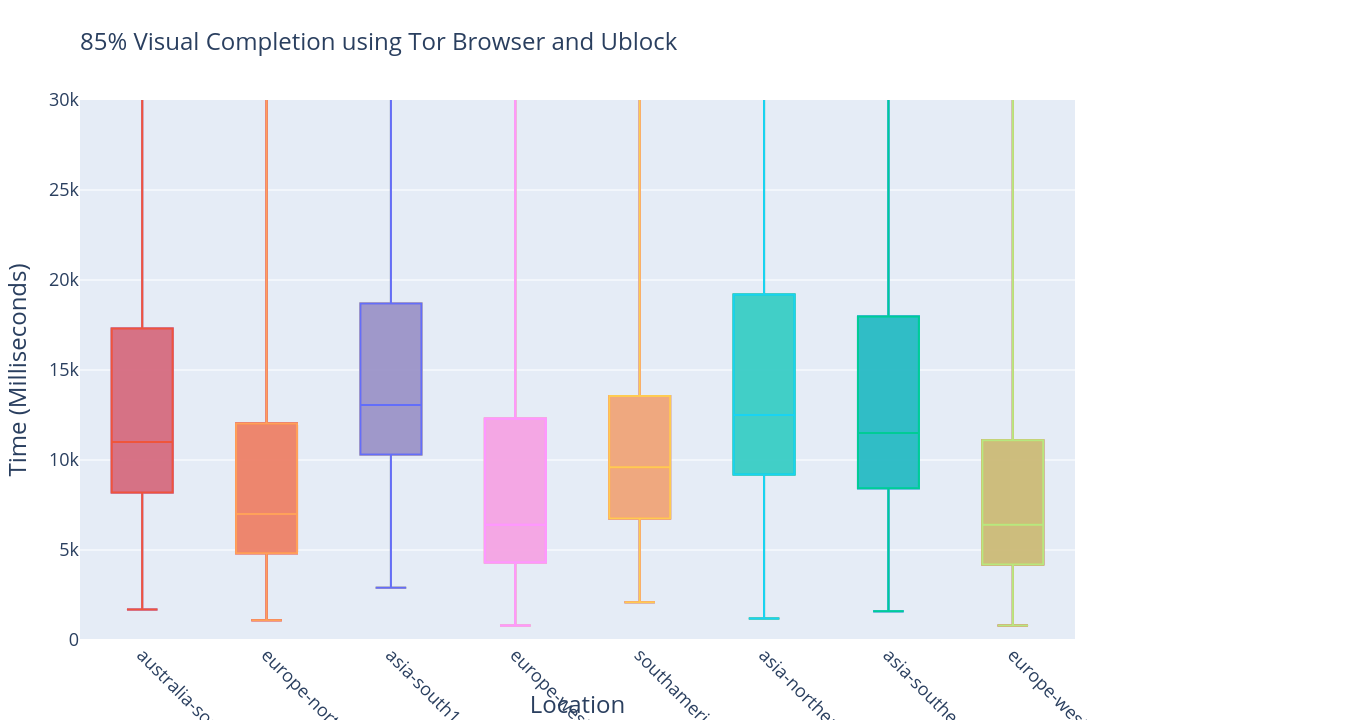

In [3]:
boxes = list()
for l in locations:
    if 'tor' in l:
        boxes.append(listToBox(selectToList(db,"""
        SELECT visualComplete85 FROM results WHERE step == 0 AND location LIKE '"""+l+"""%' AND label LIKE '%ublock%';
    """), l+'and Ublock, First Load'))
drawBoxes(boxes,'85% Visual Completion using Tor Browser and Ublock')

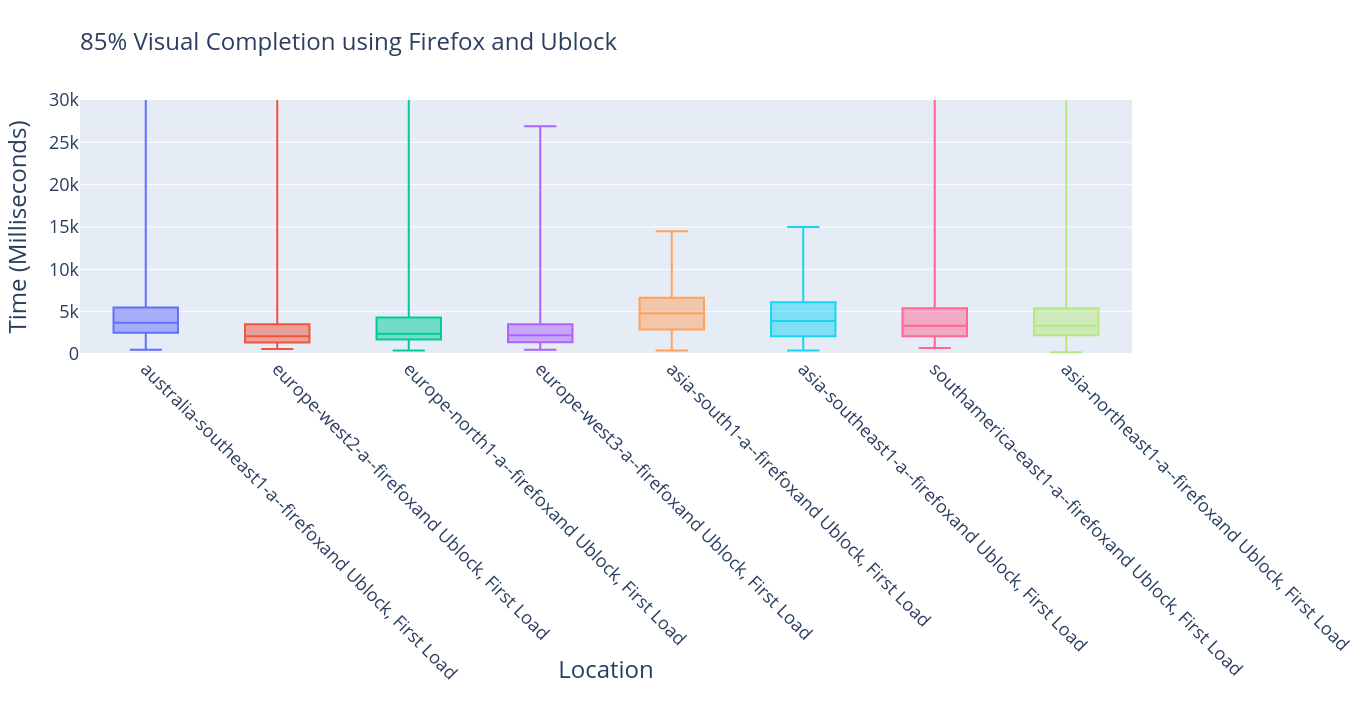

In [4]:
boxes = list()
for l in locations:
    if 'tor' not in l:
        boxes.append(listToBox(selectToList(db,"""
        SELECT visualComplete85 FROM results WHERE step == 0 AND location LIKE '"""+l+"""%' AND label LIKE '%ublock%';
    """), l+'and Ublock, First Load'))
drawBoxes(boxes,'85% Visual Completion using Firefox and Ublock')

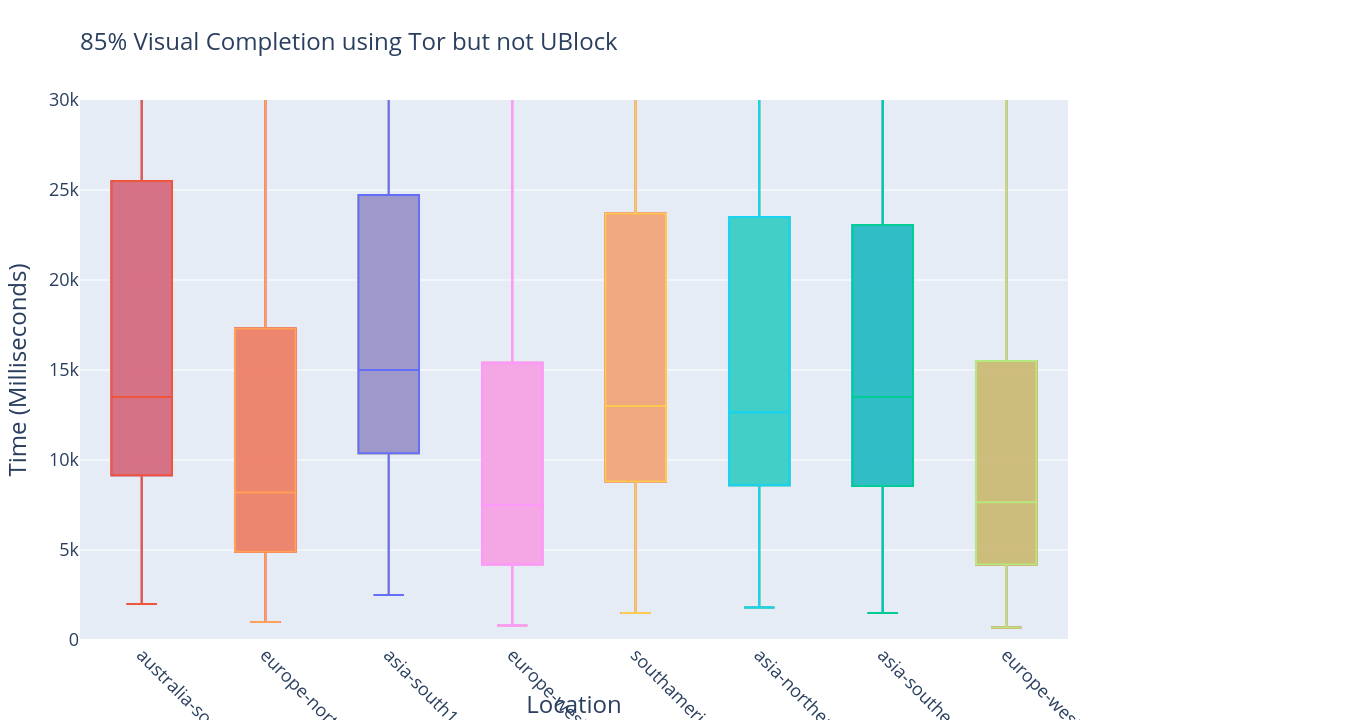

In [5]:
boxes = list()
for l in locations:
    if 'tor' in l:
        boxes.append(listToBox(selectToList(db,"""
        SELECT visualComplete85 FROM results WHERE step == 0 AND location LIKE '"""+l+"""%' AND label LIKE '%original%';
    """), l+'and Original, First Load'))
drawBoxes(boxes,'85% Visual Completion using Tor but not UBlock')

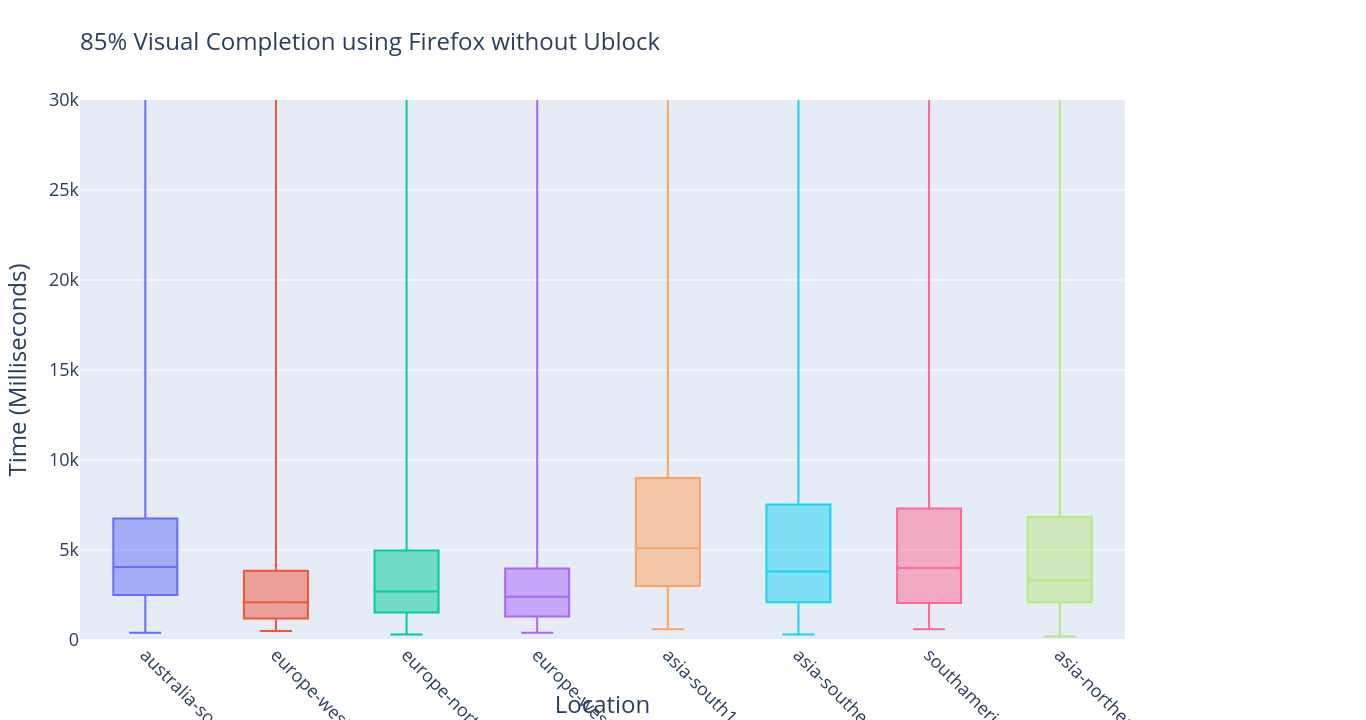

In [6]:
boxes = list()
for l in locations:
    if 'tor' not in l:
        boxes.append(listToBox(selectToList(db,"""
        SELECT visualComplete85 FROM results WHERE step == 0 AND location LIKE '"""+l+"""%' AND label LIKE '%original%';
    """), l+'and Original, First Load'))
drawBoxes(boxes,'85% Visual Completion using Firefox without Ublock')
